Для выполнения заданий возьмите данные из папки [data](https://drive.google.com/drive/folders/17E4vB5kWr5FNjLKRU4XGoJSVTxn1jkg4?usp=sharing) о продажах. Данные распределены по 4 папкам:
* sales_train.csv - данные о продажах с января 2013 по октябрь 2015.
** date - дата продажы
** date_block_num - номер месяца по порядку следования
** shop_id - идентификатор магазина
** item_id - идентификатор товара
** item_price - цена товара
** item_cnt_day - количество проданного товара одного вида в день

* items.csv - подробная информация о товарах
** item_id - идентификатор товара
** item_name - название товара
** category_id - идентификатор категории товара

* item_categories.csv - подробная информация о категориях товаров
** item_category_id - идентификатор категории товара
** category_name - название категории товара

* shops.csv - подробная информация о магазинах
** shop_id - идентификатор магазина
** shop_name - название магазина


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [1]:
import pandas as pd

In [4]:

items_categories = pd.read_csv("/content/drive/MyDrive/ITMO.Work/21 22/ВИМ/data/item_categories.csv")
items = pd.read_csv("/content/drive/MyDrive/ITMO.Work/21 22/ВИМ/data/items.csv")
sales = pd.read_csv("/content/drive/MyDrive/ITMO.Work/21 22/ВИМ/data/sales_train.csv")
sales['date'] = pd.to_datetime(sales['date'], format='%d.%m.%Y')
shops = pd.read_csv("/content/drive/MyDrive/ITMO.Work/21 22/ВИМ/data/shops.csv")

folder_path = ''

sales = pd.read_csv(folder_path+'sales_train.csv')
sales['date'] = pd.to_datetime(sales['date'], format='%d.%m.%Y')
items = pd.read_csv(folder_path+'items.csv')
items_categories = pd.read_csv(folder_path+'item_categories.csv')
shops = pd.read_csv(folder_path+'shops.csv')

In [3]:
display(items_categories.head())
display(items.head())
display(sales.head())
display(shops.head())

NameError: name 'items_categories' is not defined

Все задания по ссылке: https://docs.google.com/document/d/1IVuZfnTzgRnMjtmc8p3AEDfwYVQJK0fl-57YysOuLnk/edit

In [ ]:
# не перезапускать ячейку
from random import choice, shuffle
tasks = list(range(0,21))
shuffle(tasks)
var1 = pd.DataFrame(tasks, columns=["Задача 1"]).T
shuffle(tasks)
var2 = pd.DataFrame(tasks, columns=["Задача 2"]).T
display(var1.iloc[:,1:])
display(var1.iloc[:,0])
display(var2.iloc[:,1:])
display(var2.iloc[:,0])

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Задача 1,18,0,10,6,2,15,20,1,14,13,4,9,19,3,11,7,12,16,5,8


Задача 1    17
Name: 0, dtype: int64

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Задача 2,8,12,3,20,4,1,5,15,16,11,0,9,19,7,18,14,10,2,13,6


Задача 2    17
Name: 0, dtype: int64

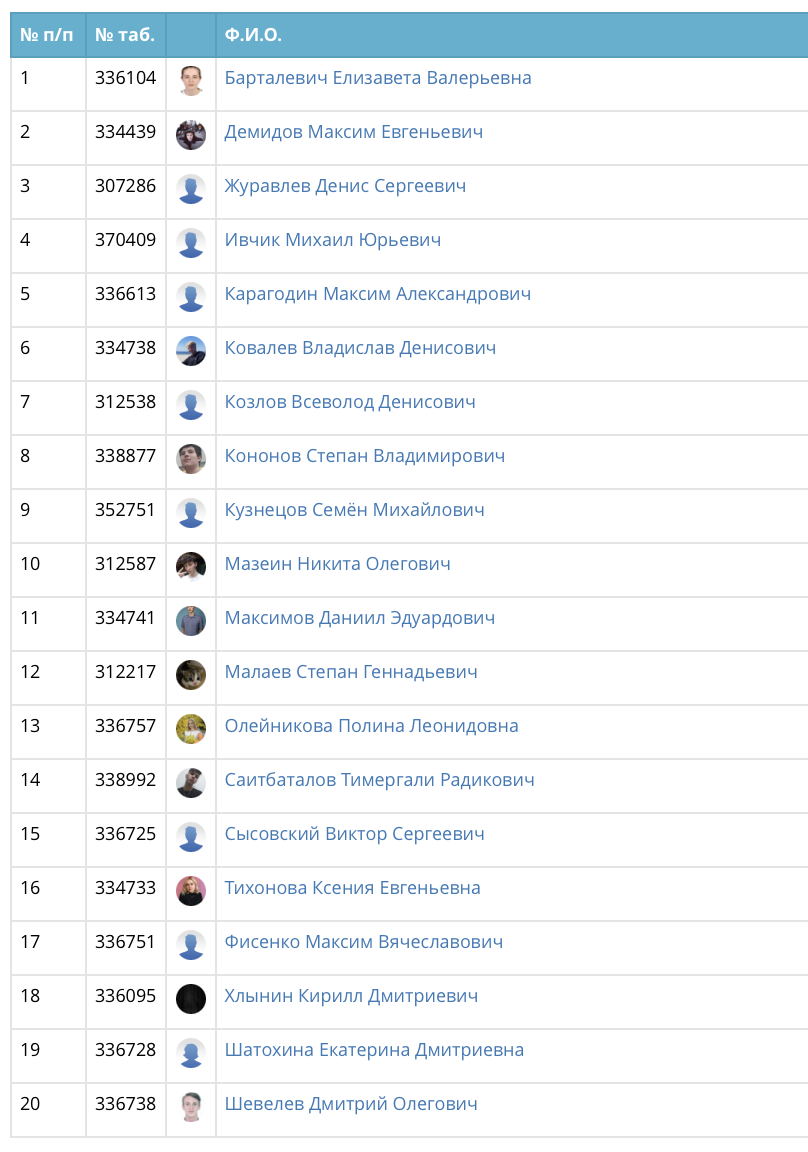

In [4]:
var1 = pd.DataFrame([0,18,17,10,6,2,15,20,11,14,13,4,1,19,3,9,7,12,16,5,8], columns=["Задача 1"])
var2 = pd.DataFrame([0,8,12,3,20,4,1,5,15,16,11,17,9,14,7,18,19,10,2,13,6], columns=["Задача 2"])
var1["Задача 2"] = var2["Задача 2"]
display(var1.T.iloc[:,1:])

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Задача 1,18,17,10,6,2,15,20,11,14,13,4,1,19,3,9,7,12,16,5,8
Задача 2,8,12,3,20,4,1,5,15,16,11,17,9,14,7,18,19,10,2,13,6


Вариант 7

## 20

Есть ли месяцы, в которые средняя цена за единицу товара выше, чем в предыдущий и следующий?


In [5]:
sales.head()

NameError: name 'sales' is not defined

In [6]:
def have_local_min_month(df):
    means = df.groupby('date_block_num')['item_price'].mean()


    mean_center = means.iloc[1:-1].reset_index(drop=True)
    mean_left = means.iloc[:-2].reset_index(drop=True)
    mean_right = means.iloc[2:].reset_index(drop=True)
    is_local_min = (mean_center < mean_left) & (mean_center < mean_right)
    return is_local_min.any()


In [7]:
sales.groupby('item_id').apply(have_local_min_month)

NameError: name 'sales' is not defined

Сделаем проверку

В 26 false в реальности тоже false

In [14]:
sales[(sales['item_id'] == 26)].groupby('date_block_num')['item_price'].mean()

date_block_num
21    58.0
Name: item_price, dtype: float64

В 27 True, в реальности тоже True

In [15]:
sales[(sales['item_id'] == 27)].groupby('date_block_num')['item_price'].mean()

date_block_num
0     2325.000000
1     1998.000000
2     1998.000000
3     1998.000000
4     1748.500000
5     1398.000000
6     1398.000000
7     1198.000000
8     1198.000000
9      942.266667
10    1198.000000
11    1048.000000
12     998.000000
14     998.000000
16     498.000000
17     498.000000
Name: item_price, dtype: float64

## 5

Найдите самый дорогой товар в категории 3 в 2013 и 2015 году.


In [18]:
items

,item_name,item_id,category_id
0,!! IN THE POWER OF HAPPINESS (PLAST) D,0,40
1,! ABBYY FineReader 12 Professional Edition Ful...,1,76
2,*** IN THE GLORY OF THE GLORY (UNV) D,2,40
3,*** BLUE WAVE (Univ) D,3,40
4,*** BOX (GLASS) D,4,40
...,...,...,...
22165,"Nuclear Titbit 2 [PC, Digital Version]",22165,31
22166,Query language 1C: Enterprise [Digital version],22166,54
22167,The query language is 1C: Enterprise 8 (+ CD)....,22167,49
22168,Egg for Little Inu,22168,62


In [26]:
# Получим данные только по товарам из категории 3
categ3_item_ids = items[items['category_id'] == 3]['item_id']
categ3_sales = sales[sales['item_id'].isin(categ3_item_ids)]

# Найдем самый дорогой товар в 2013 году
categ3_sales['year'] = categ3_sales['date'].dt.year
categ3_sales = categ3_sales[categ3_sales['year'].isin([2013, 2015])]

def get_the_most_expensive(df):
    # Среди всех продаже найдем самую дорогу продажу этого товара
    item__max_price = df.groupby('item_id')['item_price'].max()
    return item__max_price.idxmax()


categ3_sales.groupby('year').apply(get_the_most_expensive)

year
2013    5669
2015    5657
dtype: int64

Провери здравость нашего ответа

In [32]:
categ3_sales.sort_values(by='item_price', ascending=False)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,year
2627008,2015-05-01,28,31,5657,7490.00,1.0,2015
2566952,2015-04-23,27,25,5657,7490.00,1.0,2015
2570281,2015-04-24,27,21,5657,7490.00,1.0,2015
2573034,2015-04-27,27,27,5657,7490.00,1.0,2015
2584229,2015-04-17,27,48,5657,7490.00,1.0,2015
...,...,...,...,...,...,...,...
2847710,2015-09-09,32,51,5675,127.17,1.0,2015
2847713,2015-09-20,32,51,5675,127.17,1.0,2015
2919817,2015-10-09,33,10,5675,125.40,2.0,2015
2801912,2015-08-21,31,51,5675,122.61,2.0,2015


Сходится